# Week6 Lab

## Download & Extract Data

Programmatically download the zip file & extract

In [2]:

file_url = 'https://github.com/msaricaumbc/DS601_Fall21/raw/main/Week06/data/lab_data.zip'


In [15]:
import zipfile

zf = zipfile.ZipFile('..\data\lab_data.zip')
print(zf.namelist())
zf.extract('PoliceShootingsUS.csv')
# df = pd.read_csv(zf.open('intfile.csv'))

['PoliceShootingsUS.csv', '__MACOSX/._PoliceShootingsUS.csv', 'volunteers.txt', '__MACOSX/._volunteers.txt']


'c:\\Users\\}{\\Documents\\UMBC FALL 2021\\DATA_601\\DS601_Fall21\\Week06\\labs\\PoliceShootingsUS.csv'

## Reading data from a csv file

For the file `PoliceShootingsUS.csv`, please answer the following questions:

* How many offenders are older than 55? 

In [18]:
import chardet
import pandas as pd

with open(('PoliceShootingsUS.csv'), 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large


df = pd.read_csv('PoliceShootingsUS.csv', encoding=result['encoding'])

In [51]:
df[df['age'] > 55].shape[0]

235

* What's the age distribution?

In [19]:
df.shape

(2535, 14)

In [33]:
## Your code is here
df.describe().loc[['min','max']]

,id,age
min,3.0,6.0
max,2822.0,91.0


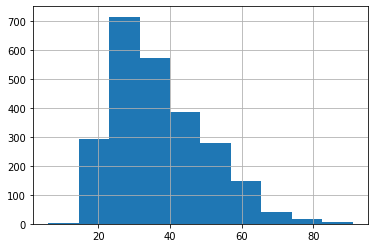

In [52]:
df['age'].hist();

## Dirty data

Read `volunteers.txt` file and perform the following action:

* Create a dataframe with columns: Name, Lastname, State

In [43]:
## Your code is here
zf.extract('volunteers.txt')

!type volunteers.txt

"log"[Harding, Christine] (Virginia) - Universal human-resource flexibility
"log"[Davis, Kimberly] (New York) - Compatible demand-driven hub
"log"[Ingram, Rachel] (Louisiana) - Versatile multimedia website
"log"[Walker, Richard] (Oregon) - Networked eco-centric approach
"log"[Barnes, Francisco] (Virginia) - Persistent systematic moratorium
"log"[Perez, Rachel] (Alaska) - Optimized national portal
"log"[Choi, Linda] (Iowa) - Operative discrete Internet solution
"log"[Gomez, Janice] (Vermont) - Managed national attitude
"log"[Lloyd, Jesus] (Connecticut) - Adaptive systematic definition
"log"[Moore, Alicia] (Michigan) - Innovative motivating support
"log"[Murray, Pamela] (Arizona) - Diverse systematic policy
"log"[Moore, Brittney] (Washington) - Progressive web-enabled synergy
"log"[Jones, Alexander] (Arizona) - Advanced 24/7 data-warehouse
"log"[Morales, David] (Florida) - Streamlined eco-centric conglomeration
"log"[Hogan, Elizabeth] (Rhode Island) - Re-engineered demand-driven groupwar

In [96]:
# use regex
import re

names = []
lastnames = []
states = []

with open('volunteers.txt', 'r') as f:
    lines = f.readlines()
  
    for line in lines:
        line = re.search("\[\w+,\s\w+\]\s\((\w+\s\w+)|(\w+)\) ", line).string.replace('[', ',').replace(']', ',').replace('(', ',').replace(')', ',')

        rows = line.split(',')
        # print(rows)
        lastname = rows[1]
        name = rows[2]
        state = rows[4]


        states.append(state)
        names.append(name)
        lastnames.append(lastname)
states

['Virginia',
 'New York',
 'Louisiana',
 'Oregon',
 'Virginia',
 'Alaska',
 'Iowa',
 'Vermont',
 'Connecticut',
 'Michigan',
 'Arizona',
 'Washington',
 'Arizona',
 'Florida',
 'Rhode Island',
 'Pennsylvania',
 'West Virginia',
 'North Carolina',
 'New Hampshire',
 'Pennsylvania',
 'Oklahoma',
 'South Carolina',
 'Mississippi',
 'Nebraska',
 'Louisiana',
 'Wyoming',
 'North Carolina',
 'Iowa',
 'Kansas',
 'South Dakota',
 'Oklahoma',
 'Nebraska',
 'Ohio',
 'Vermont',
 'Montana',
 'North Carolina',
 'Texas',
 'South Dakota',
 'Colorado',
 'Kentucky',
 'Wisconsin',
 'South Carolina',
 'Massachusetts',
 'Tennessee',
 'Tennessee',
 'Tennessee',
 'Alaska',
 'Alabama',
 'Oklahoma',
 'Maryland',
 'West Virginia',
 'Nevada',
 'Pennsylvania',
 'Wyoming',
 'Michigan',
 'South Dakota',
 'Colorado',
 'Pennsylvania',
 'Arkansas',
 'Tennessee',
 'New York',
 'Nebraska',
 'North Dakota',
 'Washington',
 'Oklahoma',
 'New Mexico',
 'Iowa',
 'Montana',
 'New York',
 'Vermont',
 'Rhode Island',
 'Alaska

In [102]:
df2 = pd.DataFrame([names, lastnames, states]).T
df2.columns = ['Name', 'LastName', 'State']

In [103]:
df2

,Name,LastName,State
0,Christine,Harding,Virginia
1,Kimberly,Davis,New York
2,Rachel,Ingram,Louisiana
3,Richard,Walker,Oregon
4,Francisco,Barnes,Virginia
...,...,...,...
95,Kevin,Smith,North Dakota
96,Mark,Moore,Alaska
97,Jennifer,Landry,Wyoming
98,Lori,Phillips,Arkansas
